In [6]:
#Business Problem,Student Marks Prediction

In [7]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
#Load DataSet
path=r"C:\Users\KIIT\Downloads\\student_info.csv"
df=pd.read_csv(path)

In [9]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [10]:
df.head()  #starting 5 heads

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [11]:
df.tail()   #ending 5 tails

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [12]:
df.shape  #200 rows ,2 columns

(200, 2)

In [13]:
#Discover and Visualize data to get Insights

In [14]:
df.info()  #full information...dataframe format..200r/2c...float type data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [15]:
df.describe() #all min,max,var,std etc provided

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


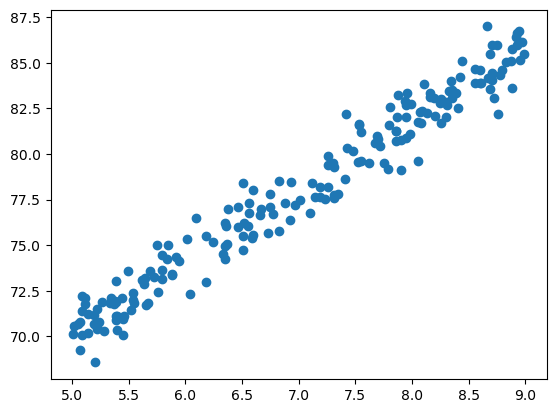

In [16]:
#GRAPH CREATION OF DATA
plt.scatter(x=df.study_hours,y=df.student_marks)  #type of visualizing graph
plt.xlabel=("Student Study Hours")        #naming x axis
plt.ylabel=("Student Marks")       #naming y axis
plt.title=("Study Hours VS Student Marks")       #giving title
plt.show()     #showing graph
#data is in linear format..straight line at corner

In [17]:
#Data Preparation for ML Model
#Data Cleaning

In [18]:
df.isnull() #if kahi koi jgh values nahi hia!

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [19]:
df.isnull().sum() #total 5 missing values

study_hours      5
student_marks    0
dtype: int64

In [20]:
#so 5 missing values ke jgh we gonna put mean of all study hours!

In [21]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [22]:
df2=df.fillna(df.mean())  #jaha NaN hai, vaha ab mean value

In [23]:
df2

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [24]:
df2.isnull() #ab check kro if NaN values hai ki nai..

,study_hours,student_marks
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [25]:
df2.isnull().sum() #total 0,0 all...data fully cleaned

study_hours      0
student_marks    0
dtype: int64

In [26]:
#we have to split dataset coz marks are dependent on hours...hours independent..marks dependent

In [27]:
X=df2.drop("student_marks",axis=1) #Capital X denotes Matrix in ML,drop krdo marks..splitted into hours only,column wise
y=df2.drop("study_hours",axis=1) #small y vectors,drop krdo hours ko,only marks..column wise
print("Shape of X= " ,X.shape) #X ka shape nikaalo, cross check krne ke liye
print("Shape of y= " ,y.shape) #y ka shape nikaalo, for cross checking

Shape of X=  (200, 1)
Shape of y=  (200, 1)


In [28]:
#now X has 200 student with 1 column hours
#y has 200 students with 1 column marks

In [29]:
from sklearn.model_selection import train_test_split 
#hamko model test n train ke way se selexct krna padta hai...80% training, 20% testing..
#SciKit Library import krna padta hai..usme train_test_split class call
#t_t_s class me 2 splitted values deni hai..X and y..both independent and dependent variable!
#test_size mtlb 20% testing hogi..always should be in decimals
#random_state=51...randomly koi value uthaana chahiye..aisa nahi ki saare same to same ho!
#X_train,X_test...this will create 4 different dataframes and store values in it
#Sizes for cross check

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)
print("Shape of X Train: ",X_train.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (160, 1)
Shape of y Train:  (160, 1)
Shape of X Test:  (40, 1)
Shape of y Test:  (40, 1)


In [31]:
#now for training X we have 160 values from 1 colum..same for y
#for testing we have 40 each in both X and y! 

In [32]:
#Select a Model and Train it!
#ther's a straight line...so here is the relation we observed...y=mx+c
#now we will work for m and c
#we will choose linear regression algo to find...
#linear(data in linear format) and regression(output will be generated continously as per input)

In [33]:
# y = m * x + c
from sklearn.linear_model import LinearRegression
lr=LinearRegression()  #creating LinearRegression() object lr
#hence maths ans LR algo are under sklearn ...so importing it first

In [35]:
lr.fit(X_train,y_train) #we dont have to apply rocket science for solving all these and applying formula
#sklearn will handle all this..fit() will train model by giving data to them

LinearRegression()

In [36]:
lr.coef_  #this will calculate 'm' value

array([[3.93571802]])

In [37]:
lr.intercept_  #value of constant 'c'

array([50.44735504])

In [42]:
#woohoo basic has been created!
#now, let
m=3.93  #calculation based on training
c=50.44
x=3 #suppose
y=m*x+c
y  #student will secure around 62.23% marks if he studies for 3 hours per day

62.23

In [45]:
lr.predict([[4]])[0][0].round(2) 
#using predict function will no longer let us use above calculation in detail..
#[0][0] will give exact possible value
#.round(2) will give till 2 decimal places

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19

In [53]:
#now we have to test our 20% trained model
y_found=lr.predict(X_test)
y_found  #we got y for every 40 data present in set

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [54]:
y_found.size  #total 40 datas

40

In [55]:
temp=pd.DataFrame(np.c_[X_test,y_test,y_found],columns=["study_hours","student_marks_original","student_marks_predicted"])
#joining actual and predicted values for comparison

temp

In [56]:
temp

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [57]:
#difference of predicted and og one is very less, so we can say that ML model is accurate for predictions


In [58]:
#Fine Tune Model, means testing Accuracy 
lr.score(X_test,y_test)
#it'll will test X items and find y_found and further calculate it with y_test
#arounf 95% accurate

0.9514124242154464

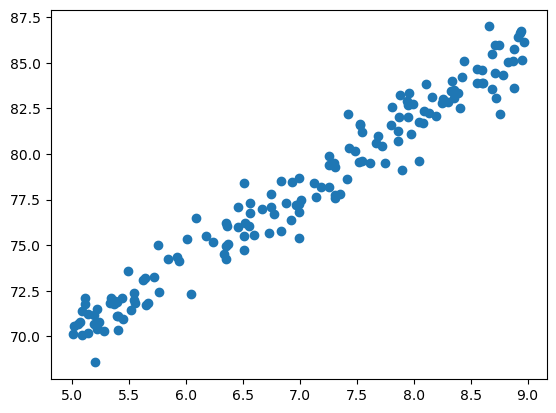

In [59]:
plt.scatter(X_train,y_train) #graph

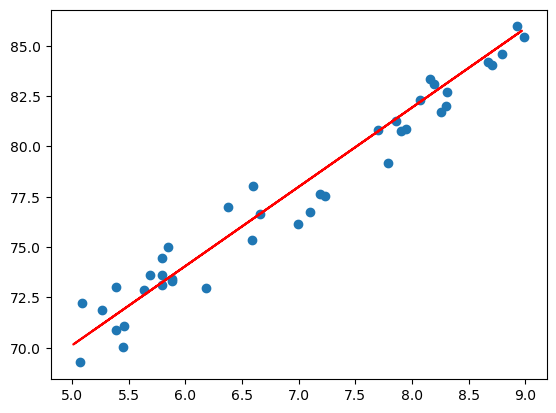

In [61]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color='r')
#X_train as X axis and lr.predict(X_train) as y axis coz we have predicted on trained X and for m color we have set r(red)

In [62]:
# 5% error because dots are not lying on straight line

In [63]:
#if Client is OK with this Accuracy, then we'll Present our Model by Saving our model
import joblib #library for saving

In [65]:
joblib.dump(lr,"Student_Mark_Prediction_Model.pkl") #project saved

['Student_Mark_Prediction_Model.pkl']

In [67]:
model=joblib.load("Student_Mark_Prediction_Model.pkl") #created model in loaded format

In [69]:
model.predict([[8.3]]) #cross check

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[83.11381458]])

In [ ]:
# this model DF loaded in cloud
#Launch,Monitor and Maintain 